In [114]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import sklearn
from pycorenlp import StanfordCoreNLP
from micromort.utils.classification_plotter import plot_classification_report
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [65]:
data_dump = pd.read_csv("./annotator_data_dump_with_polarity", delimiter="\t")
data_dump = data_dump[data_dump.polarity != 9].reset_index(drop=True)

In [66]:
data_dump['e'] = pd.Series(np.zeros(data_dump.shape[0]), index=data_dump.index)
data_dump.head()

,url,summary,category,title,polarity,e
0,http://www.straitstimes.com/world/united-state...,WASHINGTON (REUTERS) - Russian government-back...,92,Russian hackers said to have stolen US cyber s...,-1,0.0
1,http://www.straitstimes.com/world/united-state...,WASHINGTON (REUTERS) - Russian government-back...,94,Russian hackers said to have stolen US cyber s...,-1,0.0
2,http://www.channelnewsasia.com/news/health/to-...,(Reuters Health) - The best way to get teens t...,99,"To grow teen athletes, let kids try lots of sp...",0,0.0
3,http://www.straitstimes.com/asia/se-asia/prote...,JAKARTA/KUALA LUMPUR - Muslim protesters ralli...,94,Protests in Asia against Trump's decision on J...,-1,0.0
4,http://www.straitstimes.com/asia/se-asia/prote...,JAKARTA/KUALA LUMPUR - Muslim protesters ralli...,98,Protests in Asia against Trump's decision on J...,-1,0.0


In [67]:
for index, row in data_dump.iterrows():
    data = row["title"]
    blob = TextBlob(data.decode('utf-8').strip())
    if (blob.sentiment.polarity < .1 and blob.sentiment.polarity > -.1):
        data_dump["e"].values[index] = 0
    elif (blob.sentiment.polarity > .1):
        data_dump["e"].values[index] = 1
    else: 
        data_dump["e"].values[index] = -1

In [73]:
sklearn.metrics.accuracy_score(data_dump["e"].values, data_dump["polarity"].values)

0.30082358040745555

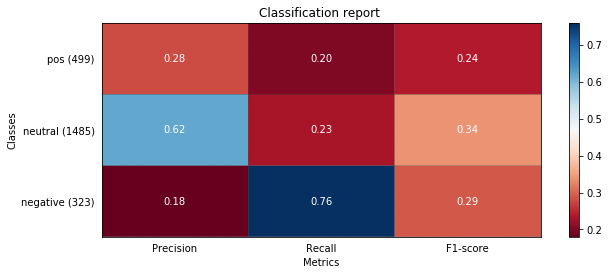

In [115]:
plot_classification_report(sklearn.metrics.classification_report(data_dump["e"].values, data_dump["polarity"].values, target_names=["negative", "neutral", "pos"]))

## Standford Deeply Moving: Deep Learning for Sentiment Analysis

### 

In [135]:
nlp = StanfordCoreNLP('http://localhost:9000')
def get_sentiment(x):
    res = nlp.annotate(x,
                       properties={
                           'annotators': 'sentiment',
                           'outputFormat': 'json'
                       })
    try:
        return res["sentences"][0]["sentiment"]
    except Exception:
        print Exception
        return ""

In [136]:
for index, row in data_dump.iterrows():
    data = row["summary"].encode('utf-8').strip()
    
    sentiment = get_sentiment(data)
    if (sentiment == "Neutral"):
        data_dump["e"].values[index] = 0
    elif (sentiment == "Positive"):
        data_dump["e"].values[index] = 1
    else: 
        data_dump["e"].values[index] = -1

In [129]:
sklearn.metrics.accuracy_score(data_dump["e"].values, data_dump["polarity"].values)

0.49111400086692675

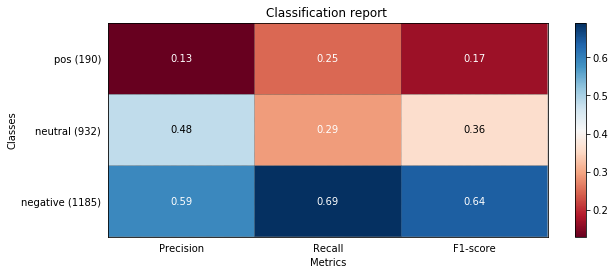

In [130]:
plot_classification_report(sklearn.metrics.classification_report(data_dump["e"].values, data_dump["polarity"].values, target_names=["negative", "neutral", "pos"]))

In [137]:
sklearn.metrics.accuracy_score(data_dump["e"].values, data_dump["polarity"].values)

0.5908105765062852

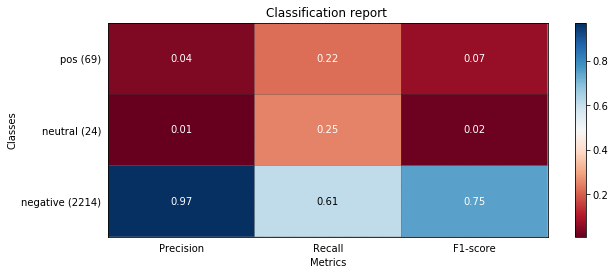

In [138]:
plot_classification_report(sklearn.metrics.classification_report(data_dump["e"].values, data_dump["polarity"].values, target_names=["negative", "neutral", "pos"]))